# I. DATA ACQUISITION (IMPORT)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import scipy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import classification_report

In [ ]:
# tyre_data = pd.read_csv("/content/drive/MyDrive/Copia di tyres_train.csv")
tyre_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PoliMi colab/MIML_ML colab/tyres_train.csv")

In [ ]:
tyre_data

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1
2997,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,NaN,0,0
2998,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,60.3,0,0


Our target variable is "failure"

In [ ]:
tyre_data['failure']

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    0
2998    0
2999    0
Name: failure, Length: 3000, dtype: int64

failure
0    1992
1    1008
dtype: int64


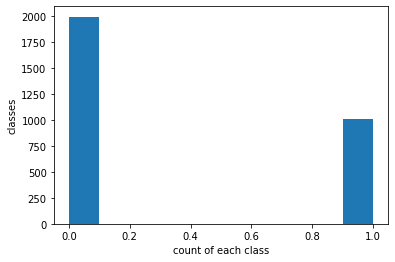

In [ ]:
# Number of successes and failures
print(tyre_data.groupby('failure').size())

# visual representation (histogram)
plt.hist(tyre_data['failure'])
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

we can see how the dataset is imbalanced


In [ ]:
# copy of the dataset to work with (so we don't have to import again)
df = tyre_data.copy(deep=True);
df

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1
2997,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,NaN,0,0
2998,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,60.3,0,0


# II. DATA PREPARATION

data: numerical and categorical attributes


In [ ]:
numerical = ["vulc", "perc_nat_rubber", "weather", "perc_imp", "temperature", "elevation", "perc_exp_comp"]
categorical_original = ["tread_type", "tyre_season", "month", "tread_depth", "wiring_strength", "tyre_quality", "add_layers"]

#### 1) Data validation 
searching for and handling 
- incompletenesses (NaN values)
- duplicate values

In [ ]:
df.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool

-> only diameter has NaN values

Lets explore it and deal with the missing data:

In [ ]:
# count non nan and nan values

df['diameter'].isna().value_counts()

True     2110
False     890
Name: diameter, dtype: int64

-> we decide to remove the whole column of diameter because the majority of the observations are Nan values

In [ ]:
# removing 'diameter' column

df = df.drop('diameter', axis=1)

In [ ]:
np.isinf(df).any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
add_layers         False
failure            False
dtype: bool

-> no infinite values

checking if there are duplicate rows

In [ ]:
df[df.duplicated()]

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure


-> no duplicate rows


#### 2) One-hot-encoding for categorical attributes
- now we are converting all the categorical attributes (there are 7 of them in our dataset)
- the one-hot encoding will create (k-1) binary columns for each categorical attribute and return a sparse matrix


In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
results = ohe.fit_transform(df[categorical_original])
dummy = pd.DataFrame.sparse.from_spmatrix(results)
dummy.columns = ohe.get_feature_names(df[categorical_original].columns)
dummy

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_2,...,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1,add_layers_0,add_layers_1,add_layers_2
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# removing extra columns
catlist = dummy.columns.tolist()
remlist = []
remlist += [catlist[-1]]
for i in range(0,len(catlist)-1):
  # print(catlist[i+1][:-2])
  if catlist[i][:-1] != catlist[i+1][:-1]:
    remlist += [catlist[i]]
remlist.remove('month_9')
remlist

['add_layers_2',
 'tread_type_4',
 'tyre_season_1',
 'month_11',
 'tread_depth_3',
 'wiring_strength_2',
 'tyre_quality_1']

In [ ]:
dummy = dummy.drop(remlist,axis=1)
dummy

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tyre_season_0,month_0,month_1,month_2,month_3,month_4,...,month_9,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_0,add_layers_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
df = pd.concat([df,dummy],axis=1)
for cat in categorical_original:
  df = df.drop(cat,axis=1)
df

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure,tread_type_0,tread_type_1,...,month_9,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_0,add_layers_1
0,17.990,26,0.16,0.01,-8.12,332.5,5.13,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,20.704,36,0.30,0.01,-4.52,328.0,6.15,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,19.156,34,0.30,0.01,-1.08,247.0,6.36,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,16.802,35,0.19,0.02,7.44,408.0,6.62,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,17.140,23,0.39,0.01,30.52,308.0,6.15,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,0.39,0.01,7.28,287.5,5.68,1,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2996,17.076,30,0.22,0.00,-1.44,152.5,5.81,1,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2997,16.170,33,0.39,0.01,-3.44,235.0,5.57,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2998,18.872,37,0.03,0.00,-0.76,290.0,5.89,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
categorical = dummy.columns
categorical

Index(['tread_type_0', 'tread_type_1', 'tread_type_2', 'tread_type_3',
       'tyre_season_0', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'tread_depth_0', 'tread_depth_1', 'tread_depth_2', 'wiring_strength_0',
       'wiring_strength_1', 'tyre_quality_0', 'add_layers_0', 'add_layers_1'],
      dtype='object')

In [ ]:
cols = df.columns.tolist()
cols.remove('failure')
cols.append('failure')
df = df[cols]
df

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,tread_type_0,tread_type_1,tread_type_2,...,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_0,add_layers_1,failure
0,17.990,26,0.16,0.01,-8.12,332.5,5.13,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1,20.704,36,0.30,0.01,-4.52,328.0,6.15,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0
2,19.156,34,0.30,0.01,-1.08,247.0,6.36,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0
3,16.802,35,0.19,0.02,7.44,408.0,6.62,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,17.140,23,0.39,0.01,30.52,308.0,6.15,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,0.39,0.01,7.28,287.5,5.68,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2996,17.076,30,0.22,0.00,-1.44,152.5,5.81,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1
2997,16.170,33,0.39,0.01,-3.44,235.0,5.57,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2998,18.872,37,0.03,0.00,-0.76,290.0,5.89,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0


### II.A. DATA EXPLORATION

We conducted data exploration to get an idea of the distribution of the data in our dataset:
- if any feature is useful to predict the failure of the tyre 
- if any feature has to be discarded or needs some transformation

So we proceeded with the univariate and bivariate analysis of numerical and categorical attributes separately.

#### 1) Numerical

In [ ]:
df[numerical].describe()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,18.184712,31.249667,0.282987,0.014550,-2.375360,376.184000,5.79151
std,1.587193,4.933300,0.183252,0.014262,5.672184,151.149861,0.41032
min,12.312000,18.000000,0.030000,0.000000,-19.280000,41.500000,4.54000
25%,17.241500,28.000000,0.160000,0.010000,-6.960000,263.500000,5.48000
50%,17.834000,31.000000,0.210000,0.010000,-2.080000,342.000000,5.80000
75%,18.934000,35.000000,0.370000,0.020000,0.080000,471.625000,6.08000
max,29.932000,46.000000,0.930000,0.050000,37.000000,939.500000,7.21000


- UNIVARIATE analysis

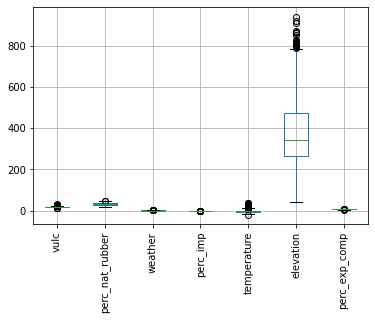

In [ ]:
df[numerical].boxplot(rot=90)

We plot a histogram for each numerical attribute to compare the empirical density of the observations with target=0 (in blue) and those with target=1 (in red) if the two charts seem to overlap completely then the attribute is probably not useful for our case.

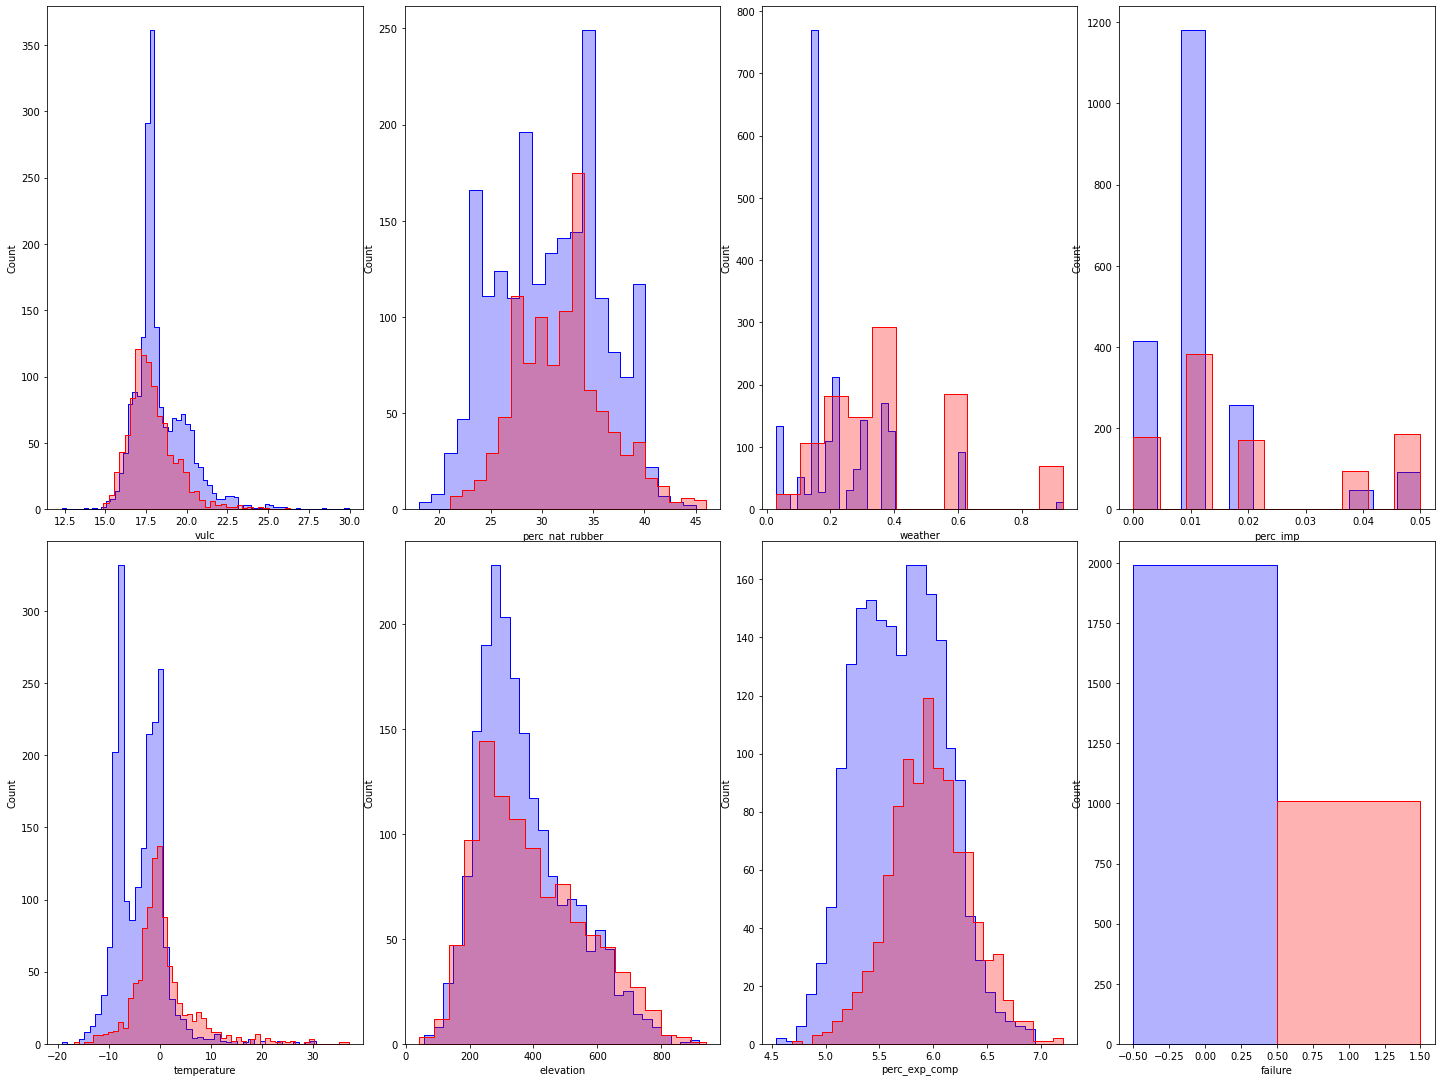

In [ ]:
%matplotlib inline

X= pd.concat([df[numerical], df['failure']], axis=1)
X0 = X[X['failure']==0]
X1 = X[X['failure']==1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(X.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", element="step", ax=ax,  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

We can see from the graphs that in every case the blue and red histograms seem to be very similar

We might tend to conclude that these numerical attributes are not useful to discern the target value, so we want to perform some additional tests to asses whether the two distributions are different (red and blue)

In this case we performed chi-test (empirical distributions) and f-test (based on the analysis of variance)

note: since chi-test needs all non-negative inputs, we proceed by scaling the numerical attributes between 0 and 1

In [ ]:
#MinMax scaling between 0 and 1

from sklearn.preprocessing import MinMaxScaler
mm_scaler =  MinMaxScaler(copy=False,feature_range=(0, 1))
mmScaled = mm_scaler.fit_transform(df[numerical])
mmscaled_df = pd.DataFrame(mmScaled)
mmscaled_df.columns = df[numerical].columns

mmscaled_df

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,0.322247,0.285714,0.144444,0.2,0.198294,0.324053,0.220974
1,0.476277,0.642857,0.300000,0.2,0.262260,0.319042,0.602996
2,0.388422,0.571429,0.300000,0.2,0.323383,0.228842,0.681648
3,0.254824,0.607143,0.177778,0.4,0.474769,0.408129,0.779026
4,0.274007,0.178571,0.400000,0.2,0.884861,0.296771,0.602996
...,...,...,...,...,...,...,...
2995,0.312486,0.392857,0.400000,0.2,0.471926,0.273942,0.426966
2996,0.270375,0.428571,0.211111,0.0,0.316986,0.123608,0.475655
2997,0.218956,0.535714,0.400000,0.2,0.281450,0.215479,0.385768
2998,0.372304,0.678571,0.000000,0.0,0.329069,0.276726,0.505618


In [ ]:
A=mmscaled_df

b=df['failure']

selector_chi=SelectKBest(feature_selection.chi2, k=5)
selector_f=SelectKBest(feature_selection.f_classif, k=5)

A_chi = pd.DataFrame(selector_chi.fit_transform(A, b),columns=A.columns[selector_chi.get_support()])
A_f = pd.DataFrame(selector_f.fit_transform(A, b),columns=A.columns[selector_f.get_support()])

In [ ]:
# we are asking to provide to us the attributes that are the most likely to be different (so the best ones)

print(A.columns[selector_chi.get_support()])
print(A.columns[selector_f.get_support()])

Index(['perc_nat_rubber', 'weather', 'perc_imp', 'temperature',
       'perc_exp_comp'],
      dtype='object')
Index(['vulc', 'weather', 'perc_imp', 'temperature', 'perc_exp_comp'], dtype='object')


In concusion, since from the tests we got that the red and blue distributions are actually different for all of the numerical attributes except 'elevation', we decided to remove the latter.

- BIVARIATE analysis

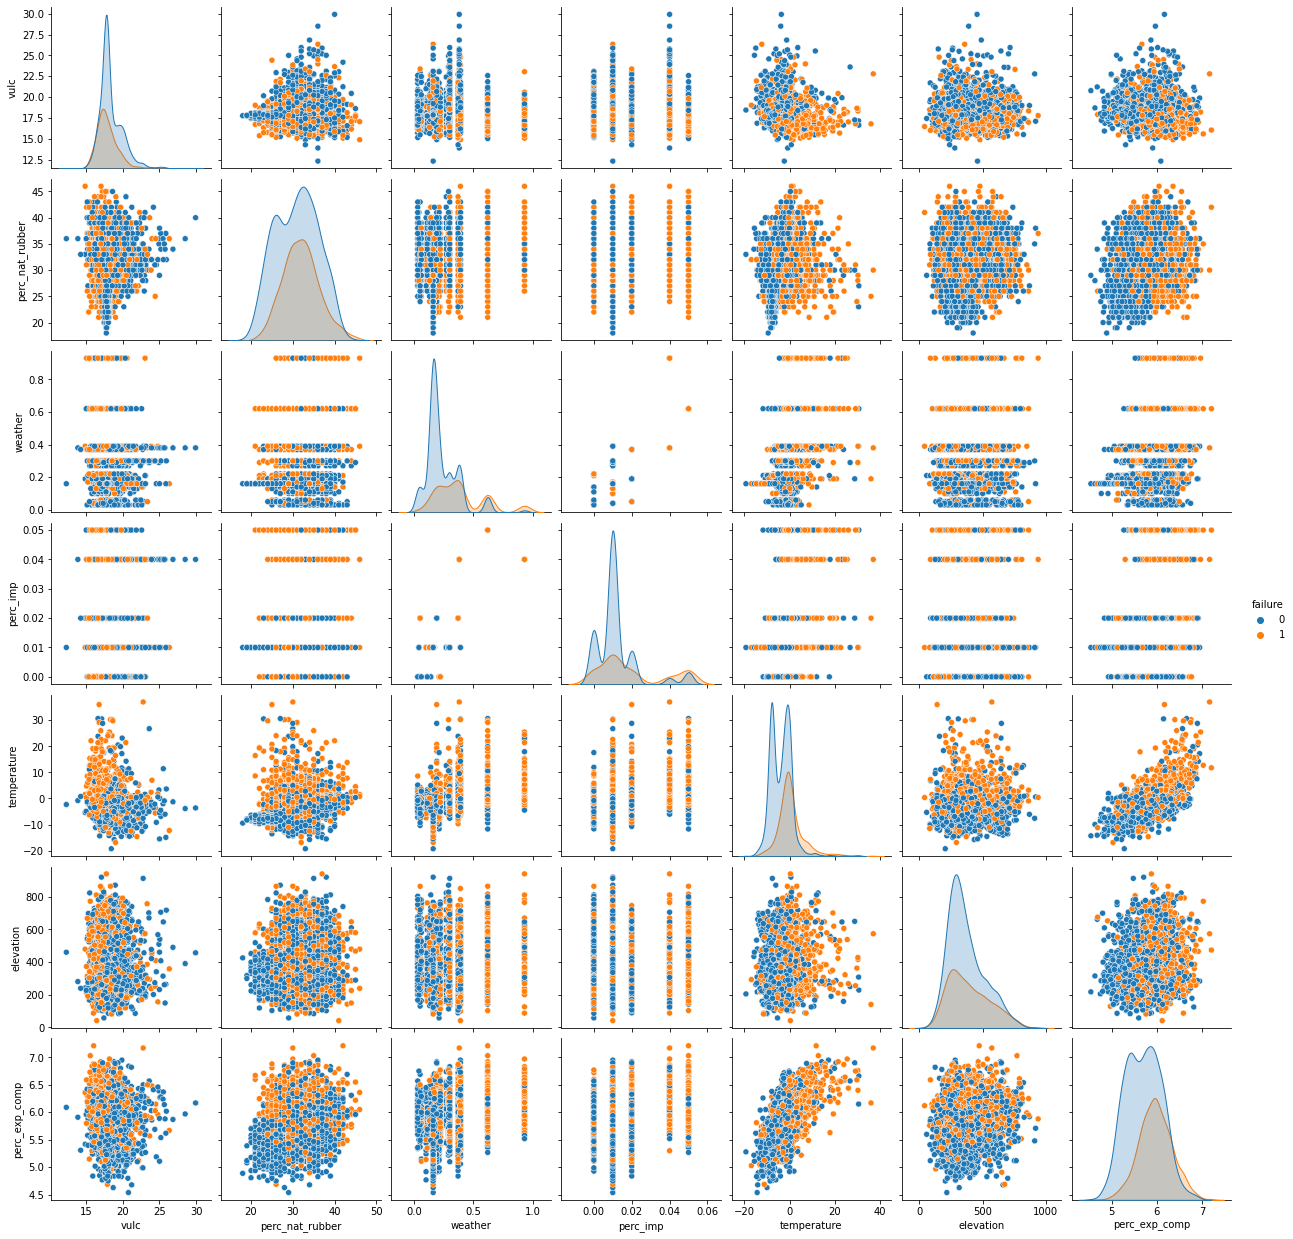

In [ ]:
# we are conducting the analysis through a scatter plot

%matplotlib inline
sns.pairplot(X,hue='failure')

#### 2) Categorical

UNIVARIATE GRAPHICAL ANALYSIS of categorical attributes
- we are plotting a vertical bar chart for each categorical attribute to compare the empirical distribution of the observations with target=0 (in blue) and those with target=1 (in red)

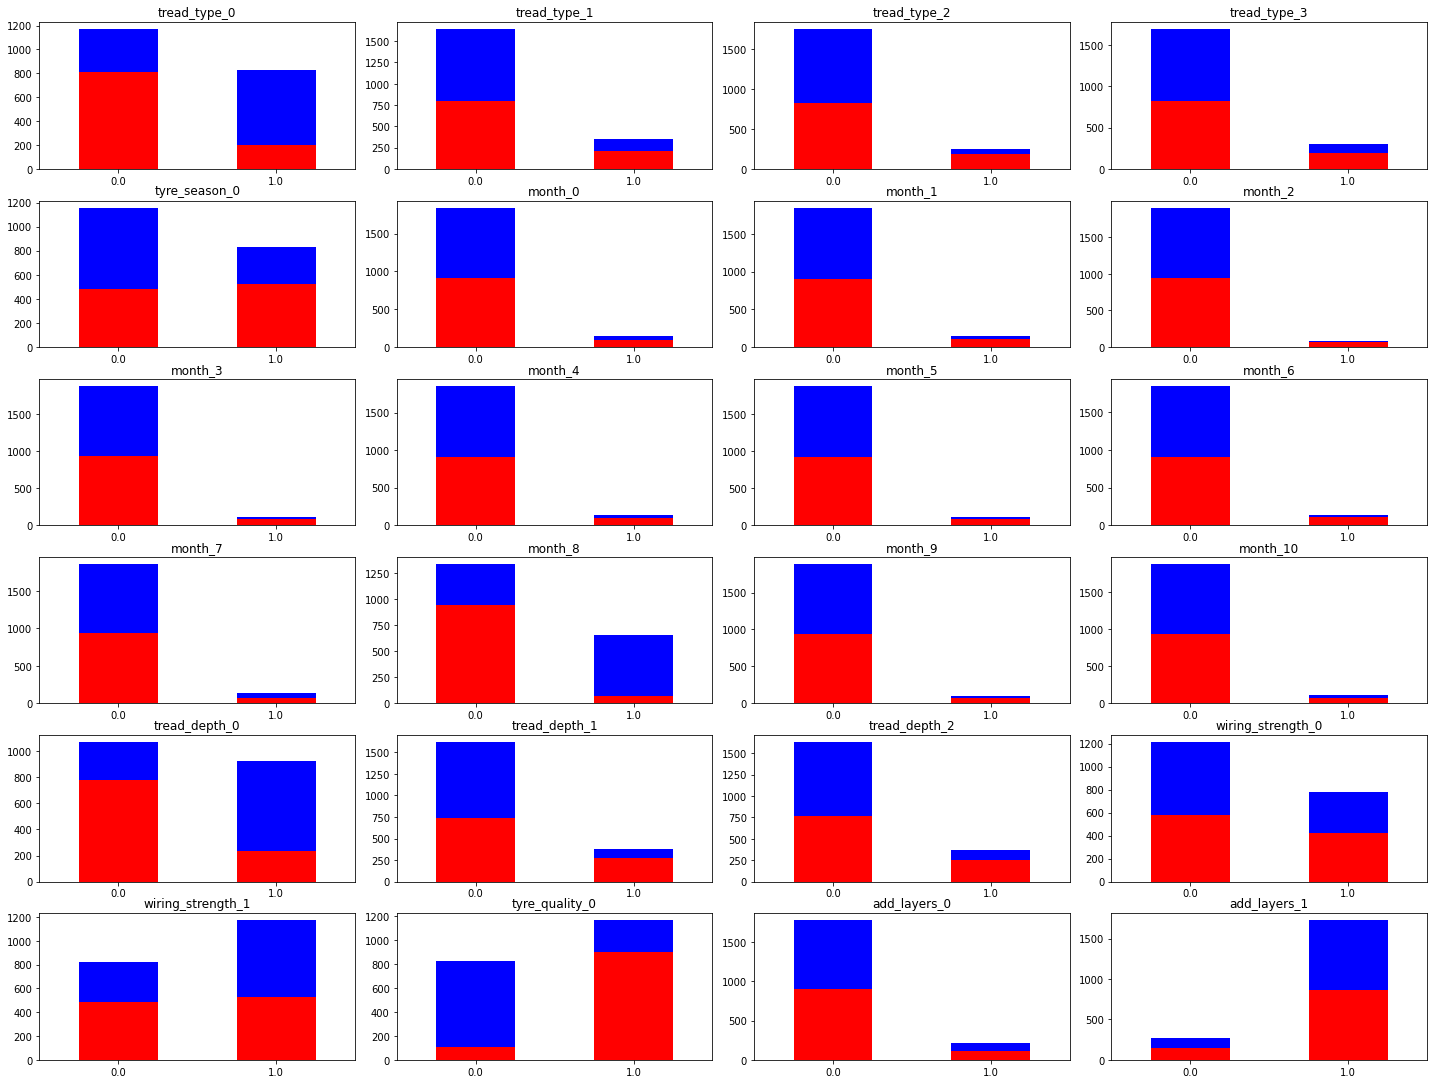

In [ ]:
Y = pd.concat([df[categorical], df['failure']], axis=1)

Y0 = Y[Y['failure']==0]
Y1 = Y[Y['failure']==1]

fig, axes = plt.subplots(ncols=4, nrows=6, figsize=(20,15))
fig.tight_layout()

for i ,ax in zip(range(Y.columns.size), axes.flat):
  Y0.iloc[:,i].value_counts(sort=False).plot.bar(rot=0, color="blue", ax=ax).set_title(Y.columns[i])
  Y1.iloc[:,i].value_counts(sort=False).plot.bar(rot=0, color="red", ax=ax)
plt.show()


#### 3) Outlier detection

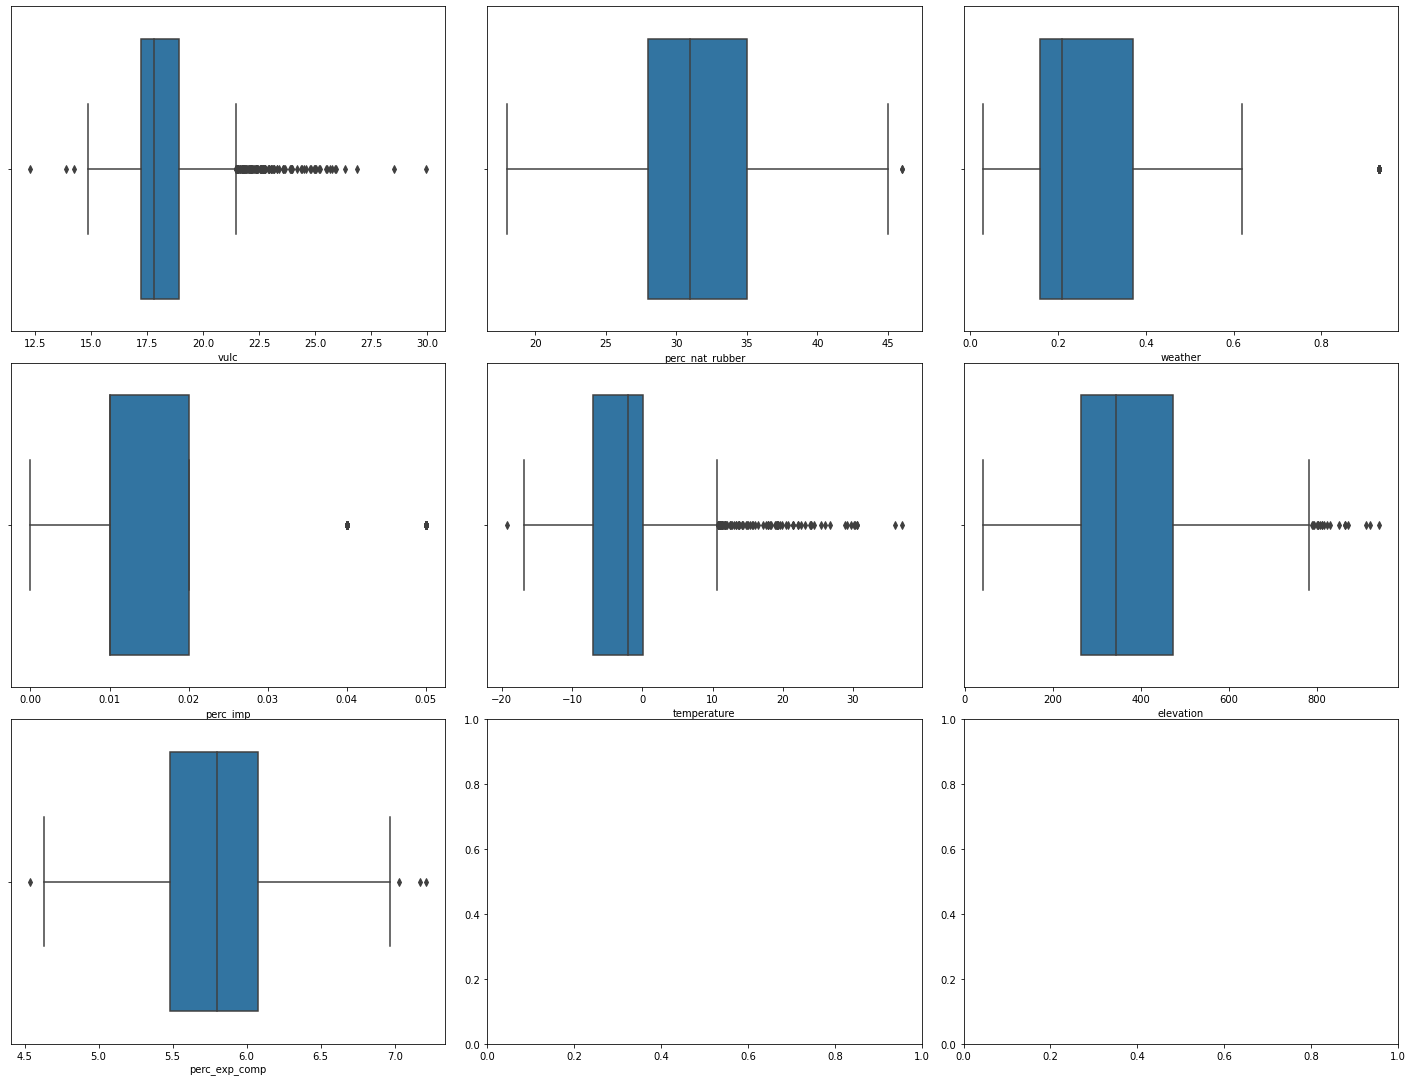

In [ ]:
%matplotlib inline

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20,15))
fig.tight_layout()

for i, ax in zip(range(df[numerical].columns.size), axes.flat):
    sns.boxplot(x=df[numerical].iloc[:,i], ax=ax)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe940bcc7c0>,
      dtype=object)

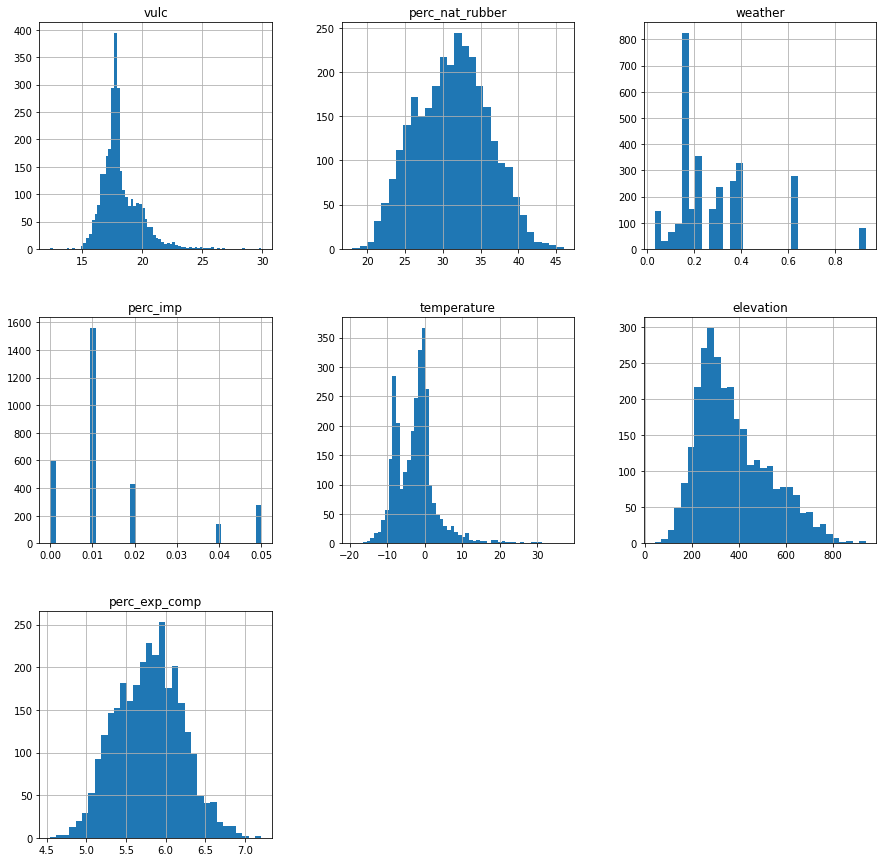

In [ ]:
df[numerical].hist(bins='auto',figsize=(15,15))

- boxplots indicated that outliers could be present, but after plotting the histograms, we notice that those "outlier" values are present in such a high number of observations that we wouldn't consider them outliers (for weather and perc_imp attributes)
- for other attributes, the "outliers" mostly follow the distribution shape so we didn't remove them

#### 4) Correlation

We checked the correlation between all of the attributes and the target attribute ('failure') to assess which ones could be more relevant for predicting the target

In [ ]:
df.corr().loc['failure']

vulc                -0.144981
perc_nat_rubber      0.103633
weather              0.401803
perc_imp             0.273367
temperature          0.364126
elevation            0.079229
perc_exp_comp        0.307221
tread_type_0        -0.217535
tread_type_1         0.038826
tread_type_2         0.083604
tread_type_3         0.045698
tyre_season_0        0.095066
month_0              0.040162
month_1              0.062862
month_2              0.039586
month_3              0.037830
month_4              0.051312
month_5              0.055764
month_6              0.055868
month_7             -0.003394
month_8             -0.287408
month_9              0.028791
month_10             0.026619
tread_depth_0       -0.226362
tread_depth_1        0.093872
tread_depth_2        0.073079
wiring_strength_0    0.030403
wiring_strength_1   -0.065282
tyre_quality_0       0.319223
add_layers_0         0.004087
add_layers_1        -0.020877
failure              1.000000
Name: failure, dtype: float64

Since there are some attributes (month_7, add_layers_0) that have a correlation value very close to 0, we tried to train the model without them.
Finally, we didn't get better scores so we kept all the attributes.

- Through a heat map, we then check the correation of each numerical attribute with the others 

The idea is that if we find two attributes that have a very high correlation we could remove one of them because it would not bring additional information to the model.

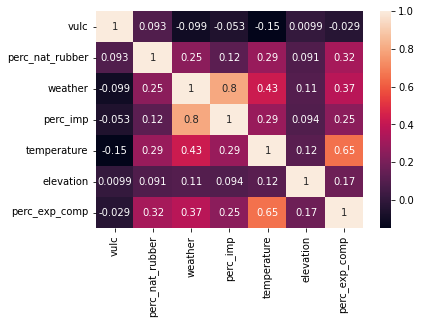

In [ ]:
sns.heatmap(df[numerical].corr(), annot=True)

From the analysis of the heat map we conclude that there are not any attributes that have a high enough correlation to remove one of them.

### II.B. DATA PRE-PROCESSING

Like we mentioned in the data exploration, we decided to remove the columns of 'elevation', 'month_7', 'add_layers_0'

In [ ]:
df2=df.drop(['elevation', 'month_7', 'add_layers_0'],axis=1)
df2

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,tread_type_0,tread_type_1,tread_type_2,tread_type_3,...,month_9,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_1,failure
0,17.990,26,0.16,0.01,-8.12,5.13,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,20.704,36,0.30,0.01,-4.52,6.15,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0
2,19.156,34,0.30,0.01,-1.08,6.36,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0
3,16.802,35,0.19,0.02,7.44,6.62,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,17.140,23,0.39,0.01,30.52,6.15,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,0.39,0.01,7.28,5.68,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2996,17.076,30,0.22,0.00,-1.44,5.81,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1
2997,16.170,33,0.39,0.01,-3.44,5.57,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2998,18.872,37,0.03,0.00,-0.76,5.89,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


#### 1) Splitting the data into train and test sets

In [ ]:
X = df2.iloc[:,0:-1]
y = df2.iloc[:,-1]

We decided to use as training set the 75% of the original dataset, and the rest (25%) for the test set.

In [ ]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.25, 
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target proportions 
                                                    random_state=123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(2250, 28) (750, 28)


In [ ]:
X_train

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,tread_type_0,tread_type_1,tread_type_2,tread_type_3,...,month_8,month_9,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_1
1056,16.444,37,0.39,0.01,0.64,6.01,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1492,17.754,22,0.16,0.01,-9.16,5.48,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2443,18.400,29,0.16,0.01,-8.72,5.38,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
133,21.532,33,0.38,0.04,-5.08,6.01,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1675,19.228,34,0.17,0.01,-2.36,5.72,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,17.708,26,0.16,0.01,-8.12,5.18,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2455,18.752,37,0.37,0.02,-1.16,5.69,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2129,16.960,29,0.39,0.01,2.00,5.93,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
249,17.738,23,0.16,0.01,-7.44,5.42,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


We demonstrate how the distribution of the target variable is mantained after the spitting in train and test set.

,train,test
failure,,
0,0.664,0.664
1,0.336,0.336


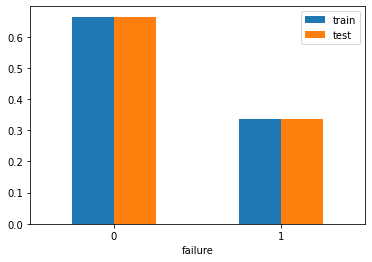

In [ ]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels
train_test_dist

#### 2) Oversampling data

oversampling by duplicating rows
- we obtained better results with this method than with undersampling and oversampling with SMOTENC (synthetic data)

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 1494, 1: 1494})


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# III. MODEL

- we tried multiple models (Decision Tree, SVM, Random Forest, LGBM...) and Random Forest appears to be the best one

## Random Forest

Random forests is an ensemble learning method for classification and other tasks that operates by constructing a multitude of decision trees at training time. 

In [ ]:
A = X_over
B = y_over

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [50, 100, 200],
            'criterion' : ['entropy', 'gini'],
             'max_depth' : [2,4,8], 
             'min_samples_split' : [1,2,4,5],
              'min_samples_leaf' : [1,2,4,5]
             }

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(A,B)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
216 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [1, 2, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=10)

In [ ]:
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.817360 using {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
nan (nan) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 50}
nan (nan) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 100}
nan (nan) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 200}
0.742225 (0.014118) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.744301 (0.009013) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.742648 (0.009416) with: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.742168 (0.004826) with: {'criterion': 'entropy', 'max_depth': 2

In [ ]:
#TESTING ON TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
# PREDICTION ON THE TEST SET

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.5559006211180124
recall:  0.7103174603174603
f1_score:  0.6236933797909407
accuracy:  0.712


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77       498
           1       0.56      0.71      0.62       252

    accuracy                           0.71       750
   macro avg       0.69      0.71      0.70       750
weighted avg       0.74      0.71      0.72       750



As it is shown by the report, the f1-score that we obtained is around 0.63

# IV. PREDICTION 

Application of the trained model on unseen test dataset

In [ ]:
# tyre_test = pd.read_csv("/content/drive/MyDrive/Copia di tyres_test.csv")
tyre_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PoliMi colab/MIML_ML colab/tyres_test.csv")

In [ ]:
tyre_test

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers
0,17.180,30,1,0.21,0.00,-9.24,0,1,460.5,4,3,0,5.54,74,1
1,17.744,24,1,0.16,0.01,-9.12,0,1,278.5,8,0,1,5.01,79,1
2,16.930,34,0,0.27,0.01,3.64,2,0,733.5,11,2,0,6.41,94,1
3,22.428,34,1,0.03,0.00,0.56,3,0,235.5,9,3,0,5.95,93,1
4,16.818,29,1,0.06,0.00,-0.96,3,0,461.0,9,0,1,5.97,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,20.060,31,1,0.29,0.01,0.40,4,1,361.5,6,2,1,5.89,85,1
7980,17.718,21,1,0.16,0.01,-8.68,0,1,409.5,8,0,1,5.56,54,1
7981,17.908,23,1,0.16,0.01,-6.92,0,1,266.0,8,0,1,5.20,62,1
7982,17.916,28,1,0.16,0.01,-7.92,0,1,301.0,8,0,1,5.76,90,1


### Data preparation

In [ ]:
tyre_test.isna().any()

vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter           False
add_layers         False
dtype: bool

In [ ]:
tyre_test = tyre_test.drop('diameter', axis=1)

One-hot-encoding:

In [ ]:
results_test = ohe.fit_transform(tyre_test[categorical_original])
dummy_test = pd.DataFrame.sparse.from_spmatrix(results_test)
dummy_test.columns = ohe.get_feature_names(tyre_test[categorical_original].columns)
dummy_test

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_2,...,tread_depth_2,tread_depth_3,wiring_strength_0,wiring_strength_1,wiring_strength_2,tyre_quality_0,tyre_quality_1,add_layers_0,add_layers_1,add_layers_2
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7980,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7981,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7982,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# removing extra columns
catlist = dummy_test.columns.tolist()
remlist = []
remlist += [catlist[-1]]
for i in range(0,len(catlist)-1):
  # print(catlist[i+1][:-2])
  if catlist[i][:-1] != catlist[i+1][:-1]:
    remlist += [catlist[i]]
remlist.remove('month_9')
remlist

['add_layers_2',
 'tread_type_4',
 'tyre_season_1',
 'month_11',
 'tread_depth_3',
 'wiring_strength_2',
 'tyre_quality_1']

In [ ]:
dummy_test = dummy_test.drop(remlist,axis=1)
dummy_test

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tyre_season_0,month_0,month_1,month_2,month_3,month_4,...,month_9,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_0,add_layers_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7982,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
tyre_test = pd.concat([tyre_test,dummy_test],axis=1)
for cat in categorical_original:
  tyre_test = tyre_test.drop(cat,axis=1)
tyre_test

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,tread_type_0,tread_type_1,tread_type_2,...,month_9,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_0,add_layers_1
0,17.180,30,0.21,0.00,-9.24,460.5,5.54,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,17.744,24,0.16,0.01,-9.12,278.5,5.01,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,16.930,34,0.27,0.01,3.64,733.5,6.41,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,22.428,34,0.03,0.00,0.56,235.5,5.95,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,16.818,29,0.06,0.00,-0.96,461.0,5.97,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,20.060,31,0.29,0.01,0.40,361.5,5.89,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7980,17.718,21,0.16,0.01,-8.68,409.5,5.56,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7981,17.908,23,0.16,0.01,-6.92,266.0,5.20,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7982,17.916,28,0.16,0.01,-7.92,301.0,5.76,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
tyre_test=tyre_test.drop(['elevation', 'month_7', 'add_layers_0'],axis=1)
tyre_test

,vulc,perc_nat_rubber,weather,perc_imp,temperature,perc_exp_comp,tread_type_0,tread_type_1,tread_type_2,tread_type_3,...,month_8,month_9,month_10,tread_depth_0,tread_depth_1,tread_depth_2,wiring_strength_0,wiring_strength_1,tyre_quality_0,add_layers_1
0,17.180,30,0.21,0.00,-9.24,5.54,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,17.744,24,0.16,0.01,-9.12,5.01,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,16.930,34,0.27,0.01,3.64,6.41,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,22.428,34,0.03,0.00,0.56,5.95,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,16.818,29,0.06,0.00,-0.96,5.97,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,20.060,31,0.29,0.01,0.40,5.89,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7980,17.718,21,0.16,0.01,-8.68,5.56,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7981,17.908,23,0.16,0.01,-6.92,5.20,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7982,17.916,28,0.16,0.01,-7.92,5.76,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
y_pred_test = best_model.predict(tyre_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [ ]:
with open(r'output.txt','w') as textfile:
  [print(x,file=textfile) for x in y_pred_test]

# V. ADDITIONAL NOTES

- Scaling

Initially we scaled the data because we tried to train different types of models, but we discarded this choice because our final model (Random Forest) does not require it and it did not improve the final result. 

- PCA

We tried doing PCA of the dataset and then training the models with the principal components obtained, but this did not improve our final result.


we considered turning months into season to have less attributes, but we decided to leave them as they were originally
